In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications.vgg16 import VGG16
import seaborn as sns
from sklearn import preprocessing
import joblib
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

Failed to read image: C:/Users/pavit/Downloads/PCOS-Detection-master/PCOS-Detection-master/data/test\infected\OIP.jpg
Failed to read image: C:/Users/pavit/Downloads/PCOS-Detection-master/PCOS-Detection-master/data/test\infected\R.jpg
Failed to read image: C:/Users/pavit/Downloads/PCOS-Detection-master/PCOS-Detection-master/data/test\notinfected\img_0_7.jpg
Failed to read image: C:/Users/pavit/Downloads/PCOS-Detection-master/PCOS-Detection-master/data/test\notinfected\OIP (1).jpg
{'infected': 0, 'notinfected': 1}


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

61/61 ━━━━━━━━━━━━━━━━━━━━ 394s 6s/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 389s 6s/step
Accuracy :  1.0
              precision    recall  f1-score   support

    infected       1.00      1.00      1.00       781
 notinfected       1.00      1.00      1.00      1139

    accuracy                           1.00      1920
   macro avg       1.00      1.00      1.00      1920
weighted avg       1.00      1.00      1.00      1920



['xray.pkl']

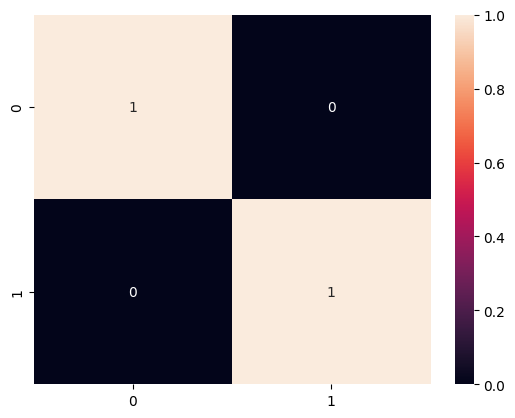

In [2]:
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 3
EPOCHS = 50
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)

def training(path) : 
    train_images = []      
    train_labels = []     
    
    path = path + '/*'
    for directory_path in glob.glob(path) :   
        label = directory_path.split('\\')[-1]       
        
        for img_path in glob.glob(os.path.join(directory_path, '*.JPG')) :    
            img = cv2.imread(img_path)     
            if img is None:
                #print(f"Failed to read image: {img_path}")
                continue
            img = cv2.resize(img, (SIZE, SIZE))                        
            train_images.append(img)
            train_labels.append(label)
    
    train_data = list(zip(train_images, train_labels))
    random.seed(SEED_TRAINING)   
    random.shuffle(train_data)
    train_images, train_labels = zip(*train_data)   
    
    # converting tuples to numpy array.
    train_images = np.array(train_images)
    train_labels = np.array(train_labels)
    
    # let's normalize our pixel values 
    train_images = train_images / 255.0
    return train_images, train_labels

def testing(path) : 
    test_images = []
    test_labels = []
    
    path = path + '/*'
    for directory_path in glob.glob(path) : 
        labels = directory_path.split('\\')[-1]
        for img_path in glob.glob(os.path.join(directory_path, '*.JPG')) : 
            img = cv2.imread(img_path)
            # img = cv2.merge((img, img, img)) 
            if img is None:
                print(f"Failed to read image: {img_path}")
                continue
            img = cv2.resize(img, (SIZE, SIZE))
            test_images.append(img)
            test_labels.append(labels)
            
    # Shuffling testing data
    test_data = list(zip(test_images, test_labels))
    random.seed(SEED_TESTING)
    random.shuffle(test_data)
    test_images, test_labels = zip(*test_data)
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)
    
    # let's normalize our pixel values
    test_images = test_images / 255.0
    return test_images, test_labels

# preprocessing training and testing images
X_test, y_test_labels = testing("C:/Users/pavit/Downloads/PCOS-Detection-master/PCOS-Detection-master/data/test")
X_train, y_train_labels = training("C:/Users/pavit/Downloads/PCOS-Detection-master/PCOS-Detection-master/data/train")

# encoding labels from text to integer
le = preprocessing.LabelEncoder()
le.fit(y_train_labels)
train_label_encoded = le.transform(y_train_labels)
#le.fit(y_test_labels)
test_label_encoded = le.transform(y_test_labels)

# extracting original labels, later we will need it.
labels = dict(zip(le.classes_,range(len(le.classes_))))
print(labels)

# aliasing for better understanding
y_train, y_test = train_label_encoded, test_label_encoded

vgg_model = VGG16(weights = 'imagenet',  include_top = False, input_shape = (SIZE, SIZE, 3)) 

for layer in vgg_model.layers : 
    layer.trainable = False

vgg_model.summary()

feature_extractor = vgg_model.predict(X_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_train_features = features

feature_extractor_test = vgg_model.predict(X_test)
features_test = feature_extractor_test.reshape(feature_extractor_test.shape[0], -1)
X_test_features = features_test

model = xgb.XGBClassifier()
model.fit(X_train_features, y_train)
prediction = model.predict(X_test_features)

prediction = le.inverse_transform(prediction)

print('Accuracy : ', metrics.accuracy_score(y_test_labels, prediction))

cm = confusion_matrix(y_test_labels, prediction)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot = True)

# Classification report
print(classification_report(y_test_labels, prediction))

# save the model
joblib.dump(model, 'xray.pkl')

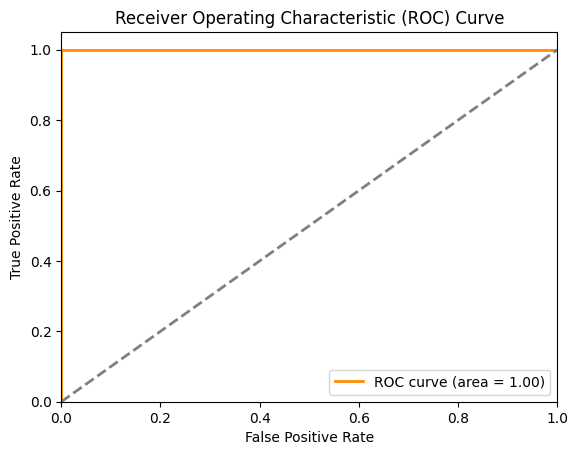

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities for the positive class
y_pred_prob = model.predict_proba(X_test_features)[:, 1]  # Use probability for class 1

# Compute ROC curve and ROC area for binary classification
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
